## First look at the data

First of all, let's import the libraries we will need.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor

Then we can create a dataframe and have a look at it.

In [6]:
df = pd.read_csv('student-mat.csv')

In [7]:
df.head()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,395.0,NaN,NaN,NaN,197.0,114.170924,0.0,98.5,197.0,295.5,394.0
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. The dataset includes information about 395 students.
2. There are 33 features. The majority of them are categorical variables. Some variables look numerical, but in fact, they are categorical. For example, *Medu* -  mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education). There are only 5 real numerical features - *age*, *absences*, and grades (*G1*, *G2*, *G3*). 
3. There are no missing values.

## EDA

First of all, we have to highlight the goals of our research:
1. Understand, which features affect the grades of students.
2. Assess the influence of alcohol consumption on the grades.

### General familiarization with the data

In this paragraph, I would like to have a look at the target (grades), at some basic features (age, sex, etc.) and at the level of alcohol consumption to get an understanding of the dataset we have. We will consider several features (which can affect the target and alcohol consumption based on my prejudiced opinion) and their influence on the target and alcohol consumption. A more precise investigation of all features will be done in the next paragraph. 

#### Distributions

In the dataset we have students from 2 different schools. Let's have a look, how many students they have.

In [6]:
pd.concat([df['school'].value_counts().to_frame(), df['school'].value_counts(normalize=True).to_frame()], axis=1)

,school,school
GP,349,0.883544
MS,46,0.116456


88% of students belong to Gabriel Pereira school, the rest belong to Mousinho da Silveira school. 

Let's have a look at the age of students.

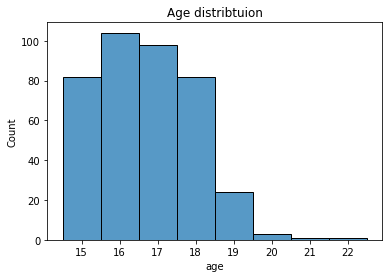

In [7]:
sns.histplot(df.age, bins=8, discrete=True)
plt.title('Age distribtuion')
plt.show()

The age of majority of students is in the range between 15 and 18. The oldest students are 22 years old.

Another basic features is gender.

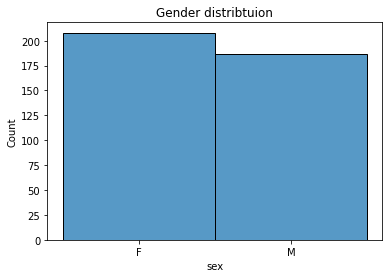

In [8]:
sns.histplot(df.sex)
plt.title('Gender distribtuion')
plt.show()

In our dataset, there are a bit more females than males.

Now we will consider the feature *Dalc*. It shows a workday alcohol consumption (from 1 - very low to 5 - very high).

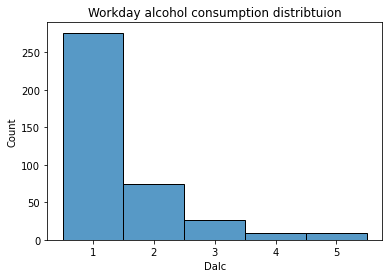

In [9]:
sns.histplot(df.Dalc, discrete=True)
plt.title('Workday alcohol consumption distribtuion')
plt.show()

In [10]:
df['Dalc'].value_counts(normalize=True)

1    0.698734
2    0.189873
3    0.065823
5    0.022785
4    0.022785
Name: Dalc, dtype: float64

From that we can conclude that the majority of students (almost 70%) do not drink alcohol during the week (1 in *Dalc* means very low consumption. It's weird that there is no choice of 0 meaning "no alcohol at all'. Since it's unrealistic to assume that every student drinks alcohol, in this notebook we will consider "very low consumption" as "no alcohol"). 19% drink a bit more than nothing, 2.5% drink a lot during the week. 

Another important feature is *Walc* - weekend alcohol consumption.

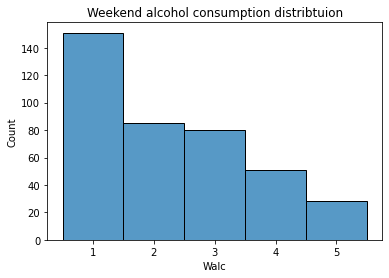

In [11]:
sns.histplot(df.Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

In [12]:
df['Walc'].value_counts(normalize=True)

1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: Walc, dtype: float64

Here the situation changes completely. It seems like students start drinking on the weekend. 

Also, it's interesting to see, how many students, that do not drink alcohol during the week, drink alcohol on the weekend. 

In [13]:
df[df['Dalc'] == 1]['Walc'].value_counts(normalize=True)

1    0.543478
2    0.235507
3    0.152174
4    0.054348
5    0.014493
Name: Walc, dtype: float64

More than 45%.

Another interesting feature could be *absences*.

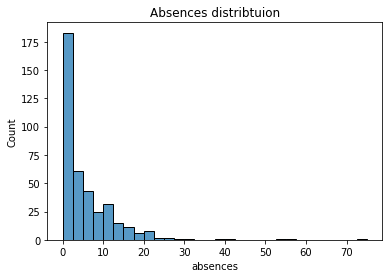

In [14]:
sns.histplot(df['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

Most students either do not have a lot of absences or have 0 absences at all. But there are some unique students that have more than 30 absences.

Now, we can go to our target - grades.

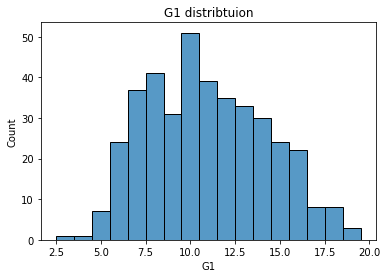

In [15]:
sns.histplot(df['G1'], discrete=True)
plt.title('G1 distribtuion')
plt.show()

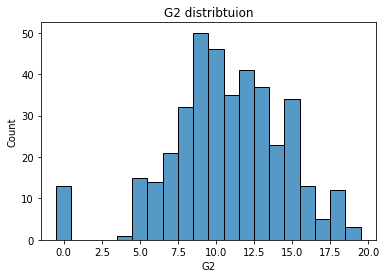

In [16]:
sns.histplot(df['G2'], discrete=True)
plt.title('G2 distribtuion')
plt.show()

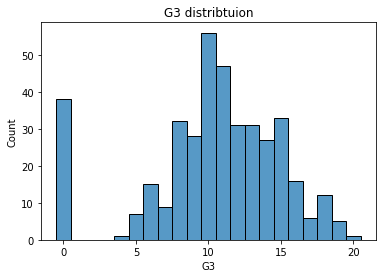

In [17]:
sns.histplot(df['G3'], discrete=True)
plt.title('G3 distribtuion')
plt.show()

These three distribtuions look similar to normal distribution. *G2* and *G3* have outliers in 0. According to https://www.scholaro.com/pro/Countries/Portugal/Grading-System, the lowest possible grade in Portugal is 1. Let's have a look at the students that have 0 grade.

In [18]:
df.query('G3 == 0')

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,128,GP,M,18,R,GT3,T,2,2,services,...,3,3,3,1,2,4,0,7,4,0
130,130,GP,F,15,R,GT3,T,3,4,services,...,4,2,2,2,2,5,0,12,0,0
131,131,GP,F,15,U,GT3,T,1,1,at_home,...,4,3,3,1,2,4,0,8,0,0
134,134,GP,M,15,R,GT3,T,3,4,at_home,...,5,3,3,1,1,5,0,9,0,0
135,135,GP,F,15,U,GT3,T,4,4,services,...,4,3,3,1,1,5,0,11,0,0
136,136,GP,M,17,R,GT3,T,3,4,at_home,...,5,4,5,2,4,5,0,10,0,0
137,137,GP,F,16,U,GT3,A,3,3,other,...,4,3,2,1,1,5,0,4,0,0
140,140,GP,M,15,U,GT3,T,4,3,teacher,...,2,2,2,1,1,3,0,7,9,0
144,144,GP,M,17,U,GT3,T,2,1,other,...,5,4,5,1,2,5,0,5,0,0
146,146,GP,F,15,U,GT3,T,3,2,health,...,3,3,2,1,1,3,0,6,7,0


We can separate these students into two groups:
1. Students of the first group have *G2*, but *G3* is 0. It can be missing values, or by the time when the dataset was being created the student did not have a grade due to some circumstances. 
2. Students of the second group have zero in *G2*, and in *G3* as well. We can assume that these students left the school after the first period. 

We can assume that students usually have approximately the same grade in the first and second periods, as well as final grade. Let's check this assumption.

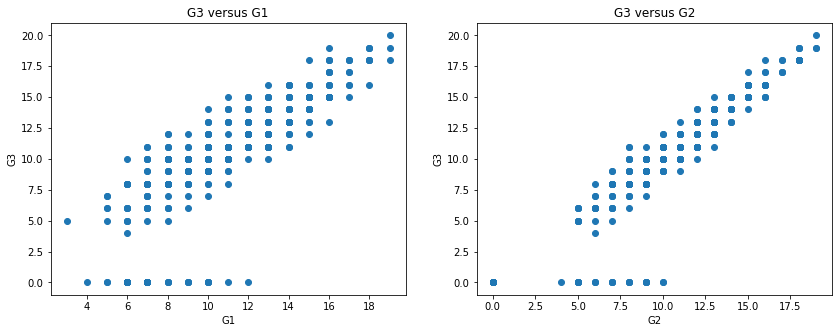

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(data=df, x='G1', y='G3')
axes[0].set_title('G3 versus G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=df, x='G2', y='G3')
axes[1].set_title('G3 versus G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

We can clearly see that points are scattered around the line y=x, which means that our assumption is correct.

For simplicity's sake in future reasoning, we will consider only G1, and obtained results can be applied to G2 and G3 as well. 

#### Alcohol consumption

Let's have a closer look at alcohol consumption among students.

First of all, we will consider the effect of gender on alcohol comsuption.

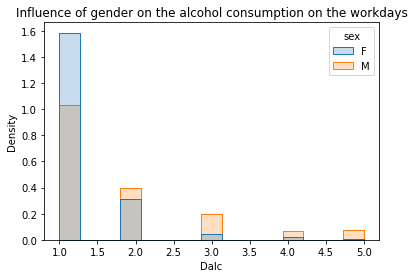

In [20]:
sns.histplot(data=df, x="Dalc", hue="sex", element="step",  stat="density")
plt.title('Influence of gender on the alcohol consumption on the workdays')
plt.show()

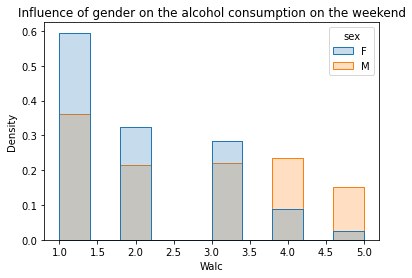

In [21]:
sns.histplot(data=df, x="Walc", hue="sex", element="step",  stat="density")
plt.title('Influence of gender on the alcohol consumption on the weekend')
plt.show()

In [22]:
df.groupby('sex')[['Dalc', 'Walc']].mean()

,Dalc,Walc
sex,,
F,1.254808,1.956731
M,1.732620,2.663102


We can clearly see that boys drink more than girls, which is to be expected. And both groups drink more on the weekend in comparison to the weekdays. 

Now let's investigate the influence of age on alcohol consumption.

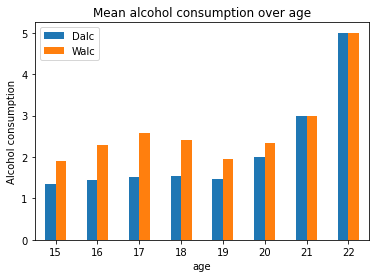

In [23]:
df.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=0)
plt.title('Mean alcohol consumption over age')
plt.show()

With an increase of age, alcohol consumption on the weekend also increases and reaches the peak at 17 years old, then it decreases a bit and again increases significantly at age of 20-22. But, as we remember from the previous section, we have only a few students older than 19, so this data is not representative for them. 

We can summarize on one table mean alcohol consumption for every age and number of students of this age.

In [24]:
df.groupby('age')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
         mean count      mean count
age                                
15   1.353659    82  1.902439    82
16   1.432692   104  2.278846   104
17   1.520408    98  2.571429    98
18   1.548780    82  2.414634    82
19   1.458333    24  1.958333    24
20   2.000000     3  2.333333     3
21   3.000000     1  3.000000     1
22   5.000000     1  5.000000     1

Other features that can affect alcohol consumptions are the type of place of living (urban or rural) and the parent's cohabitation status (living together or apart).

Let's start with the type of place of living. Let's build a table showing the mean values and number of students, and then build the distribtuions of alcohol consumption. 

In [25]:
df.groupby('address')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
address                                
R        1.636364    88  2.534091    88
U        1.436482   307  2.221498   307

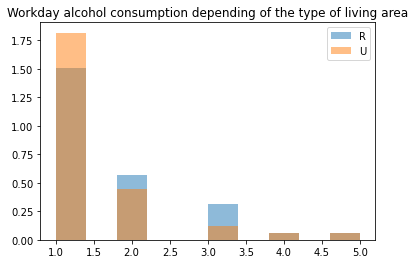

In [26]:
for group, data in df.groupby('address'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the type of living area')
plt.show()

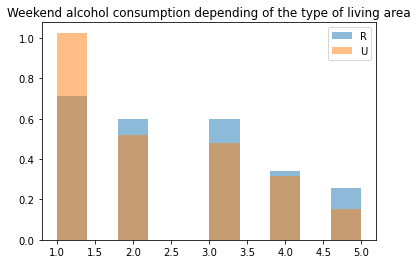

In [27]:
for group, data in df.groupby('address'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the type of living area')
plt.show()

It seems like students which live in rural area consume more alcohol, but the number of these students are not so high. To be sure we can carry out the statisctical test.

Build two samples.

In [28]:
sample_R = df.query('address == "R"')['Walc']
sample_U = df.query('address == "U"')['Walc']

Set the significance level - 0.05.

We will use t-test.

In [29]:
st.ttest_ind(sample_R, sample_U).pvalue

0.04457793151864655

P-value is lower than the significance level. It means that the probability to take these samples randomly is low (with a condition that there is no difference in alcohol consumption), and we can conclude that the difference is significant. Students living in rural area drink more alcohol that students living in urban area.

Now we can consider the parent's cohabitation status.

As in the previous case, we will check the mean values, number of students in each group and then build the distributions.

In [30]:
df.groupby('Pstatus')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
Pstatus                                
A        1.560976    41  2.268293    41
T        1.471751   354  2.293785   354

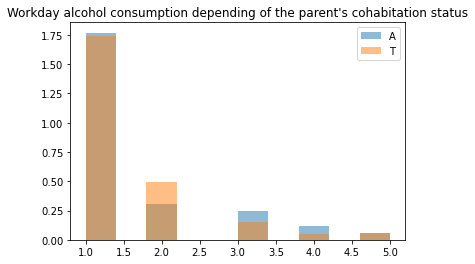

In [31]:
for group, data in df.groupby('Pstatus'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

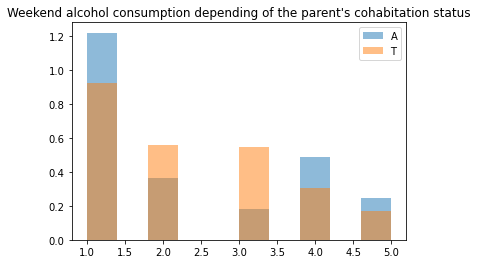

In [32]:
for group, data in df.groupby('Pstatus'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

Students, which parents live apart, drink a bit more on the weekdays and a bit less on the weekend in comparison with those, which parents live together. Taking into account the small sample of students, which parents live apart, we can not say that the difference is significant. So, the parent\'s cohabitation status does not affect students alcohol consumption.

#### Features affecting the grade

As we said in section 2.1.1, we will consider only G1.

In this section we will consider how the features discussed above affect the target (*G1*).

Let's start with age. Does age affect the grade at school? Do students get better marks as they get older or in the opposite? We will take into account only students younger than 20 because we have enough data of them.

First of all, we will check the distribution of grades for every age.

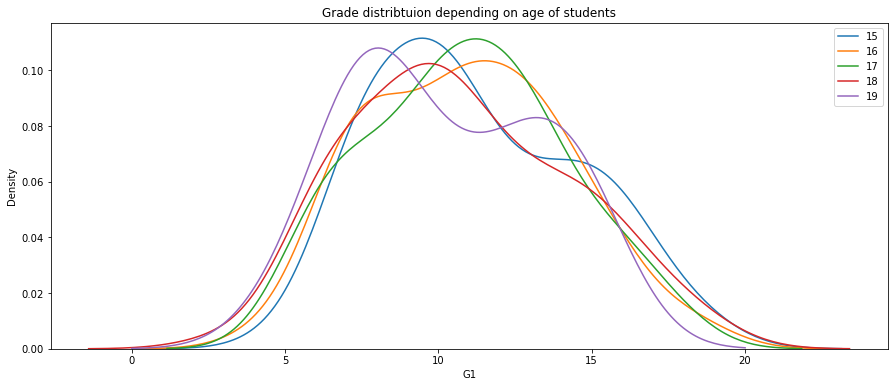

In [33]:
plt.figure(figsize=(15,6))
for age, grouped_data in df.groupby('age'):
    if age <= 19:
        sns.kdeplot(grouped_data['G1'], label=age)
plt.legend()
plt.title('Grade distribtuion depending on age of students')
plt.show()

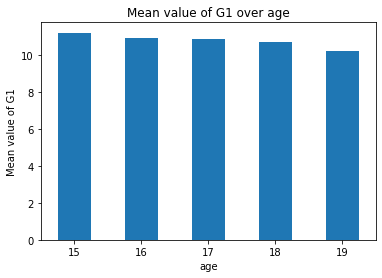

In [34]:
df.query('age <= 19').groupby('age')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over age')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

The distribution of G1 over ages do not differ too much. The mean value is slightly decreasing. Let's check, whether the difference between ages is significant or not by applying the statistical test.

We will use t-test with a significance level of 0.05

In [35]:
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 19')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 18')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 17')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 16')['G1'], equal_var=False).pvalue)

0.19327505866818148
0.3430850642066231
0.49815301469480133
0.5528168347429009


The difference is insignificant, so we can conclude that age does not affect the grade.

Now we can move on to gender.

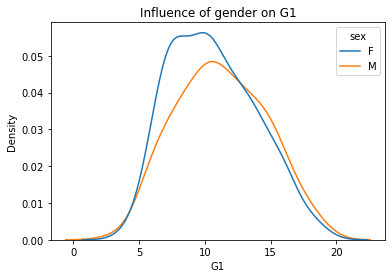

In [36]:
sns.kdeplot(data=df, x="G1", hue="sex")
plt.title('Influence of gender on G1')
plt.show()

In [37]:
df.groupby('sex')[['G1']].mean()

,G1
sex,
F,10.620192
M,11.229947


The distributions are slightly different and the mean value for males is higher than for females. The difference is not big enough to be confident, so we will again apply the statistical test, namely t-test with a significance level of 0.05.

In [38]:
st.ttest_ind(df.query('sex == "M"')['G1'], df.query('sex == "F"')['G1'], equal_var=False).pvalue

0.06898106402330258

The p-value is higher than the significance level, so we do not have enough reasons to reject the null hypothesis. Based on this, we can conclude that mean G1 for males and females are the same. And we can say that gender does not affect the grade. 

Now it's time to consider the influence of alcohol consumption on the grade.

As in the previous cases, we will build distributions and then compare the mean values. 

Let's start with workday alcohol consumption.

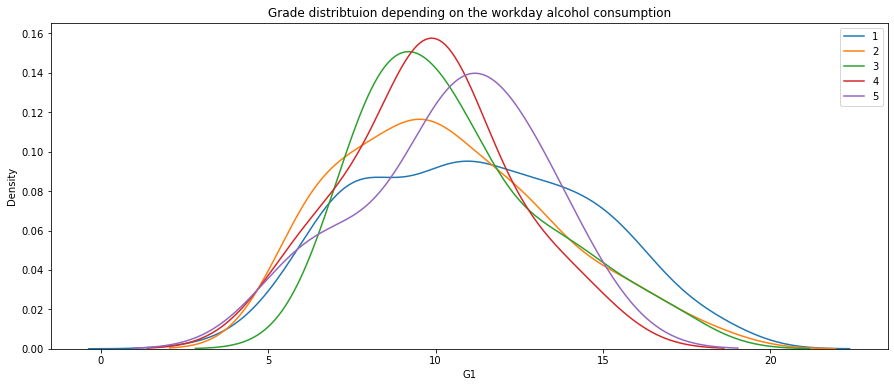

In [39]:
plt.figure(figsize=(15,6))
for dalc, grouped_data in df.groupby('Dalc'):
    sns.kdeplot(grouped_data['G1'], label=dalc)
plt.legend()
plt.title('Grade distribtuion depending on the workday alcohol consumption')
plt.show()

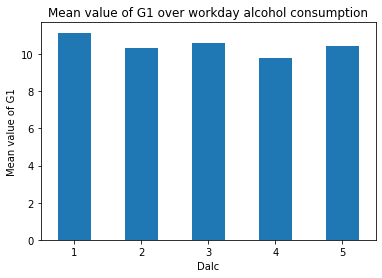

In [40]:
df.groupby('Dalc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over workday alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Distributions are different. For students that consume a low amount of alcohol on workdays (or no alcohol at all), there is a wide peak, but for students that consume more alcohol, this peak is narrower. The mean values are slightly different, and students with the lowest alcohol consumption have the highest mean grade, but the groups have different sizes and our sample is relatively small, so we can not be sure. Let's turn again to the t-test with a significance level of 0.05.

In [41]:
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 2')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 3')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 4')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 5')['G1'], equal_var=False).pvalue)

0.04323868914586449
0.3117327064366279
0.1275605526483468
0.446010208160306


Also it's useful to have a look at a sample size.

In [42]:
df.groupby('Dalc')['Dalc'].count().to_frame()

,Dalc
Dalc,
1,276
2,75
3,26
4,9
5,9


The difference between the first and second groups is significant. Other differences are not significant, but it can be caused by the small size of the groups with higher alcohol consumption.

So, I tend to assume that workday alcohol consumption affects grade, and the lower alcohol consumption - the better grade.

Now we will do the same procedure but for alcohol consumption on the weekend.

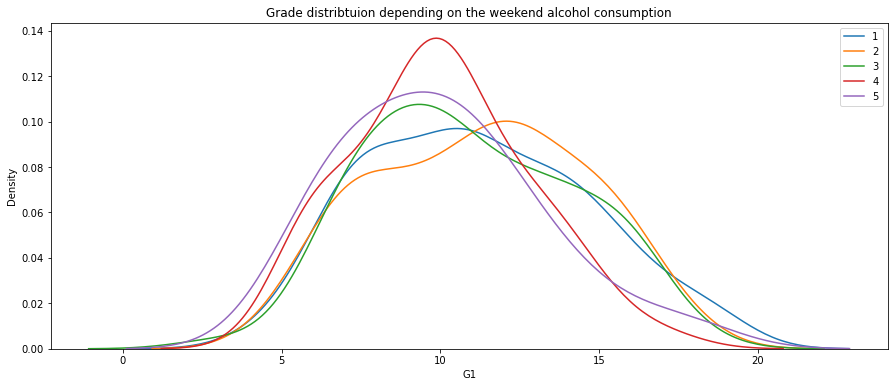

In [43]:
plt.figure(figsize=(15,6))
for walc, grouped_data in df.groupby('Walc'):
    sns.kdeplot(grouped_data['G1'], label=walc)
plt.legend()
plt.title('Grade distribtuion depending on the weekend alcohol consumption')
plt.show()

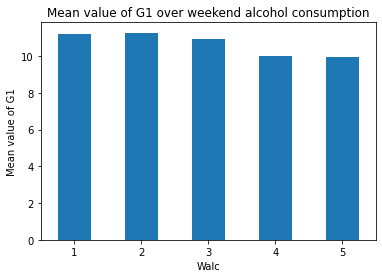

In [44]:
df.groupby('Walc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over weekend alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Here we have a similar situation to that we had with workday alcohol consumption. Again we need to apply the t-test. Now group 2 has the highest mean value, so it'll be compared with other groups.

In [45]:
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 1')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 3')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 4')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 5')['G1'], equal_var=False).pvalue)

0.8413238345026541
0.516145067869843
0.0161625232653966
0.06736401492389404


In [46]:
df.groupby('Walc')['Walc'].count().to_frame()

,Walc
Walc,
1,151
2,85
3,80
4,51
5,28


In spite of p-value in the last case being slightly higher than our significance level, I would say that the high alcohol consumption on the weekend leads to low grade at school. Students with low and medium alcohol consumption on the weekend have the same grade.

#### Conclusions

In this paragraph, several features and their influence on the grade were briefly investigated. The conclusions are following:
1. The age of the majority of students in the dataset is in the range between 15 and 18. The oldest student is 22 years old.
2. The majority of students (almost 70%) do not drink alcohol during the workdays, 19% drink a bit more than nothing, 2.5% drink a lot during the workdays.
3. The situation with alcohol consumption changes on the weekend. Only 38% of students do not drink, 22% drink a bit, 20% have medium consumption, 13% - higher than medium, 7% - the highest consumption.
4. The grades have distributions similar to the normal distribution. There is a strong linear correlation between grade in the first period, grade in the second period, and final grade. 
5. Male students consume more alcohol than female students. 
6. With an increase in age, alcohol consumption on the weekend also increases and reaches its peak at 17 years old.
7. Students living in rural areas drink more alcohol than students living in urban areas.
8. Age and gender do not affect grade. 
9. Alcohol consumption affects grade. Students, that have high alcohol consumption, have lower grade.

### Feature importances

It's very important to understand which features affect the target and which features don't, and also it's useful to somehow assess their influence. In the previous paragraph, we did this stochastically: just randomly considered several features that could affect the target based on our knowledge and experience. 

But we have 30 features and it would be quite problematic to precisely consider all of them. However, there is a way how to do it methodically and intelligently. 

We will estimate the feature importances and then only the most important features will be precisely considered.

There are different ways to estimate feature importances: correlation analysis, machine learning models, etc.

#### Correlation analysis

The correlation analysis means finding linear correlation between numeric variables. Unfortunately, we have only 2 numeric variables (*age* and *absences*), and in our case it's meaningless to apply the correlation analysis. 

Anyway, let's calculate the correlation at least for these 2 features.

In [47]:
df[['age', 'absences', 'G1']].corr()

,age,absences,G1
age,1.000000,0.175230,-0.064081
absences,0.175230,1.000000,-0.031003
G1,-0.064081,-0.031003,1.000000


The correlation is very weak.

Also, we have to keep in mind that correlation accounts only for linear dependence. It's the main disadvantage of the approach.

#### Analysis of linear regression coefficients

If we bring all features to the same scale, we are able to assess feature importance by coefficients (weights) of the linear regression model.

Let's create the matrix of features and the dependent variable vector.

In [48]:
features_imp = df.copy().drop(['index', 'G1', 'G2', 'G3'], axis=1)
target_imp = df.copy()['G1']

In [49]:
print(features_imp.shape)
print(target_imp.shape)

(395, 30)
(395,)


Now we can standardize the numerical features.

In [50]:
scaler_num = StandardScaler()
features_imp[['age', 'absences']] = scaler_num.fit_transform(features_imp[['age', 'absences']])

For encoding the categorical features One Hot Encoding technique will be used.

In [51]:
ohe_columns = []
for col in features_imp.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
        
features_imp = pd.get_dummies(features_imp, drop_first=True, columns=ohe_columns)

In [52]:
features_imp.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,1.023046,0.036424,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.238380,-0.213796,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.330954,0.536865,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-1.330954,-0.464016,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.546287,-0.213796,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


The features and the target are prepared. Now we can build the linear regression model.

In [53]:
linear_regressor = LinearRegression()
linear_regressor.fit(features_imp, target_imp)

LinearRegression()

Let's make a dataframe containing the features and their weights.

In [54]:
feature_importances_lr_coef = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                         pd.Series(linear_regressor.coef_, name='weights')],
                                        axis=1)

In [55]:
feature_importances_lr_coef

,features,weights
0,age,-0.050109
1,absences,0.157432
2,school_MS,-0.106426
3,sex_M,0.918640
4,address_U,0.225349
...,...,...
64,Walc_5,0.377821
65,health_2,-0.816278
66,health_3,-1.050511
67,health_4,-0.979161


The sign of weights is not important for us, so we can use the absolute values.

In [56]:
feature_importances_lr_coef['weights'] = abs(feature_importances_lr_coef['weights'])

Let's have a look at the 20 features (including dummy variables, in fact there will be less), that have the strongest influence on the target.

In [57]:
feature_importances_lr_coef = feature_importances_lr_coef.sort_values(by='weights', ascending=False).reset_index(drop=True)

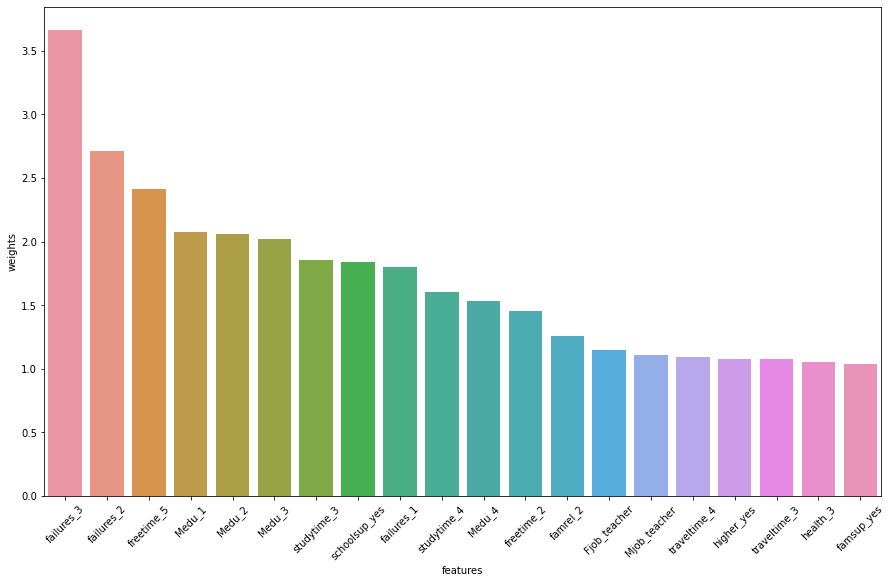

In [58]:
plt.figure(figsize=(15,9))
sns.barplot(data=feature_importances_lr_coef[:20], x='features', y='weights')
plt.xticks(rotation=45)
plt.show()

Combining related dummy variables into single features, we can highlight the most important features: 
1. *failures* - number of past class failures.
2. *freetime* - free time after school.
3. *Medu* - mother's education.
4. *studytime* - weekly study time.
5. *schoolsup* - extra educational support.
6. *famrel* - quality of family relationships.
7. *Fjob* - father's job (whether father is teacher or not).
8. *Mjob* - mother's job (whether mother is teacher or not).
9. *traveltime* - home to school travel time.
10. *higher* - wants to take higher education.
11. *health* - current health status.
12. *famsup* - family educational support.

#### Feature importances using Random Forest

This method is based on the attribute available for RandomForestRegressor. The procedure is very simple: fit the RandomForestRegressor and then call the attribute.

We will use the same matrix of features, as well as the dependent variable vector, as we used in the previous section.

Since RandomForestRegressor has a lot of hyperparameters to tune, we have to find the optimum ones. GridSearchCV will be applied.

In [59]:
parameters = {'max_depth' : [8, 10, 12, 20],
              'n_estimators' : [200, 250, 300],
              'max_features' : [5, 25, 50],
              'min_samples_split' : [2, 4, 6],
              'min_samples_leaf' : [1, 2, 3, 4]}
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(features_imp, target_imp)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 20],
                         'max_features': [5, 25, 50],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 250, 300]},
             scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 300}

Now we can train the model.

In [61]:
regressor_rf = RandomForestRegressor(max_depth=12, n_estimators=300, max_features=25, min_samples_split=6, random_state=42)
regressor_rf.fit(features_imp, target_imp)

RandomForestRegressor(max_depth=12, max_features=25, min_samples_split=6,
                      n_estimators=300, random_state=42)

Let's make a dataframe containing the features and their importnaces.

In [62]:
feature_importances_rf = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                    pd.Series(regressor_rf.feature_importances_, name='importance')],
                                    axis=1).sort_values(by='importance', ascending=False).reset_index(drop=True)

In [63]:
feature_importances_rf

,features,importance
0,absences,0.060971
1,schoolsup_yes,0.049489
2,failures_3,0.047631
3,age,0.032128
4,Medu_4,0.032069
...,...,...
64,Walc_5,0.006013
65,Fjob_health,0.002838
66,Dalc_5,0.001971
67,Dalc_4,0.001679


As in the previous section, let's have a look at the 20 features and by combining dummy variables into single features the most important features will be highlighted.

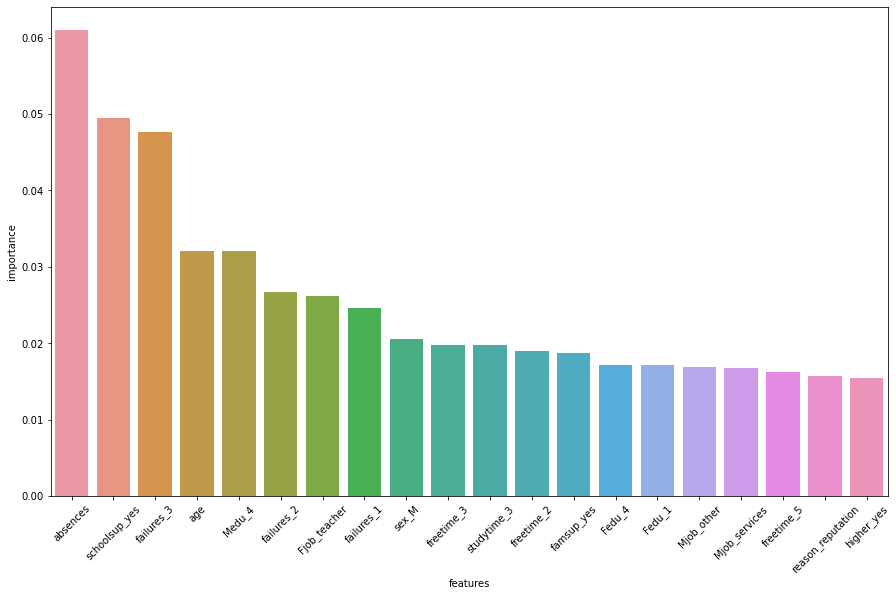

In [64]:
plt.figure(figsize=(15,9))
sns.barplot(data=feature_importances_rf[:20], x='features', y='importance')
plt.xticks(rotation=45)
plt.show()

The most important features based on the Random Forest:
1. *absences* - number of school absences.
2. *schoolsup* - extra educational support.
3. *failures* - number of past class failures.
4. *age*.
5. *Medu* - mother's education.
6. *Fjob* - father's job (whether father is teacher or not).
7. *sex*.
8. *freetime* - free time after school.
9. *studytime* - weekly study time.
10. *famsup* - family educational support.
11. *Fedu* - father's education.
12. *Mjob* - mother's job.
13. *reason* - reason to choose this school.
14. *higher* - wants to take higher education.

#### Conclusions

In this paragraph, feature importances were defined using different approaches. The following conclusions were obtained:
1. Correlation analysis is not applicable because the majority of features are categorical.
2. Based on the analysis of linear regression coefficients the top-5 features that have the most influence on the target are the following: *failures*, *freetime*, *Medu*, *studytime*, *schoolsup*.
3. Based on Random Forest the top-5 features that have the most influence on the target are the following: *absences*, *schoolsup*, *failures*, *age*, *Medu*.
4. Both algorithms agree regarding *failures*, *freetime*, *Medu* and *schoolsup*, but there are some contradictions: while Random Forest considers *age*, *absences* and *sex* important features, weights of these features in Linear Regression are small. It should be clarified in the next step. Important features from both algorithms should be investigated in detail.

### Detailed consideration of important features

In this paragraph we will get a closer look at the important features highlighted in the previous paragraph.

Let's have a look at *failures*.

#### Number of past class failures

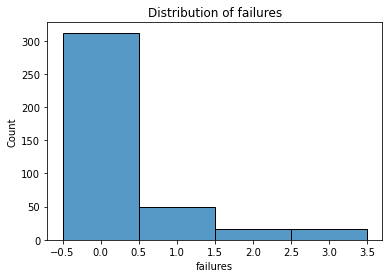

,failures
0,0.789873
1,0.126582
2,0.043038
3,0.040506


In [65]:
sns.histplot(df['failures'], discrete=True)
plt.title('Distribution of failures')
plt.show()
df['failures'].value_counts(normalize=True).to_frame()

79% of students do not have any past class failures. Let's have a look at how this fact affects grade. We will separate the dataset according to the number of past class failures and build a distribution of grade for them.

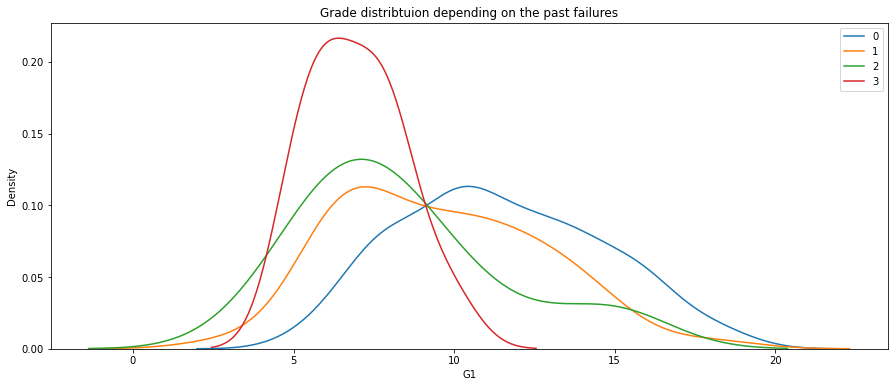

In [66]:
plt.figure(figsize=(15,6))
for failures, grouped_data in df.groupby('failures'):
    sns.kdeplot(grouped_data['G1'], label=failures)
plt.legend()
plt.title('Grade distribtuion depending on the past failures')
plt.show()

Based on the distributions, we can clearly see that students, which do not have any past class failures, have the better grade. It means, that on the previous step both algorithms were correct regarding the importance of this feature.

#### Free time after school

Another important feature, that was recognized by both algorithms, is *freetime* (free time after school (from 1 - very low to 5 - very high)).

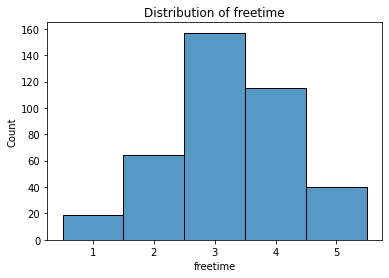

,freetime
3,0.397468
4,0.291139
2,0.162025
5,0.101266
1,0.048101


In [67]:
sns.histplot(df['freetime'], discrete=True)
plt.title('Distribution of freetime')
plt.show()
df['freetime'].value_counts(normalize=True).to_frame()

It seems like a normal distribution. 5% of students have very low freetime, 10% of students have a lot of freetime. Let's have a look at how it affects the target.

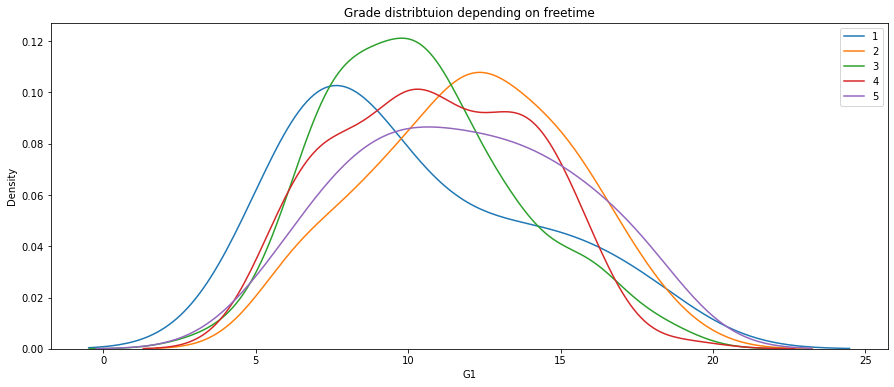

In [68]:
plt.figure(figsize=(15,6))
for freetime, grouped_data in df.groupby('freetime'):
    sns.kdeplot(grouped_data['G1'], label=freetime)
plt.legend()
plt.title('Grade distribtuion depending on freetime')
plt.show()

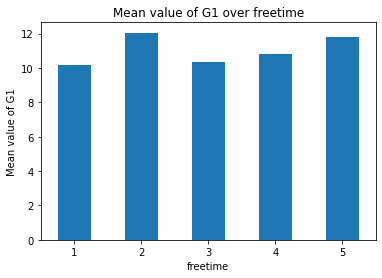

In [69]:
df.groupby('freetime')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over freetime')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

From the distribution and the comparison of mean values, we can conclude that students with very low freetime after school have a worse grade, which is reasonable because they can be busy with sports training or musical school (or whatever) and they do not have enough time to study. 

#### Mother's education

Now we move on to *Medu* which means mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

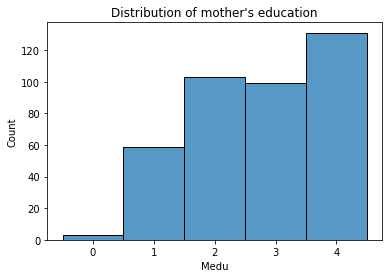

,Medu
4,0.331646
2,0.260759
3,0.250633
1,0.149367
0,0.007595


In [70]:
sns.histplot(df['Medu'], discrete=True)
plt.title('Distribution of mother\'s education')
plt.show()
df['Medu'].value_counts(normalize=True).to_frame()

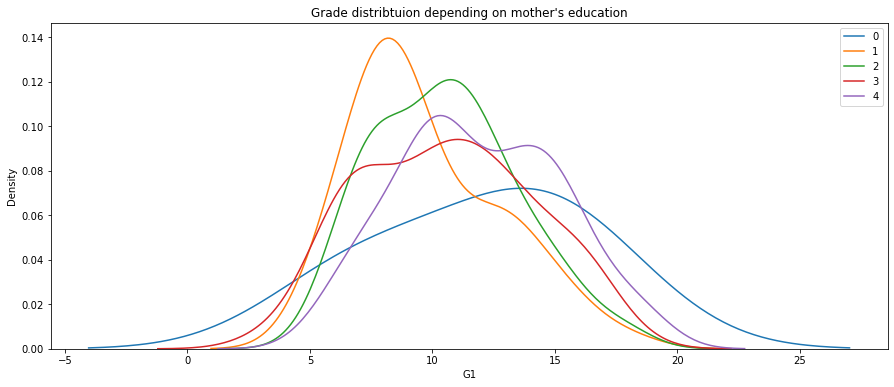

In [71]:
plt.figure(figsize=(15,6))
for medu, grouped_data in df.groupby('Medu'):
    sns.kdeplot(grouped_data['G1'], label=medu)
plt.legend()
plt.title('Grade distribtuion depending on mother\'s education')
plt.show()

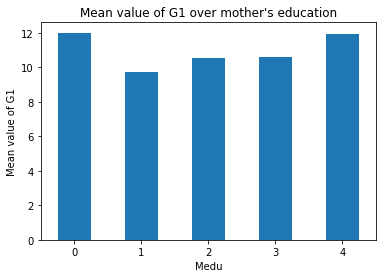

In [72]:
df.groupby('Medu')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over mother\'s education')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

The sample for students, which mothers have no education at all, is too small. So we can drop it from consideration. Based on other observations, we can conclude that the higher the level of mother's education the better grade. 

#### Extra educational support

Another important feature is *schoolsup* - extra educational support (yes or no). Let's have a look and find out how many students get extra educational support.

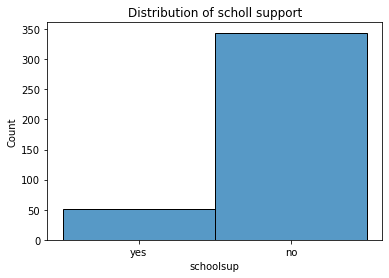

,schoolsup
no,0.870886
yes,0.129114


In [73]:
sns.histplot(df['schoolsup'], discrete=True)
plt.title('Distribution of scholl support')
plt.show()
df['schoolsup'].value_counts(normalize=True).to_frame()

Only 13% of students get extra educational support. We can assume that they are quite bad at math, therefore they have to take additional classes, and probably their grade should be lower.

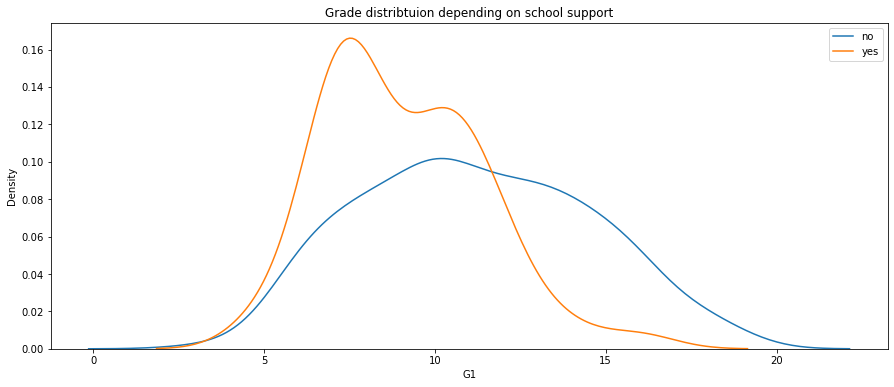

In [74]:
plt.figure(figsize=(15,6))
for schoolsup, grouped_data in df.groupby('schoolsup'):
    sns.kdeplot(grouped_data['G1'], label=schoolsup)
plt.legend()
plt.title('Grade distribtuion depending on school support')
plt.show()

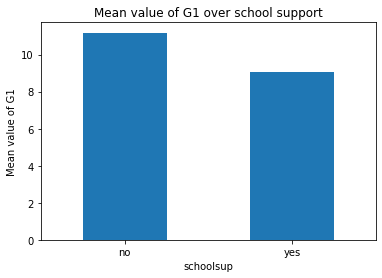

In [75]:
df.groupby('schoolsup')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over school support')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Yes, our assumption was correct. Students, that don't have extra educational support, have higher average grade.

#### Study time

Another feature, that was recognized as important by both algorithms, is *studytime* - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours). Let's have a look at how many hours peer week they study. 

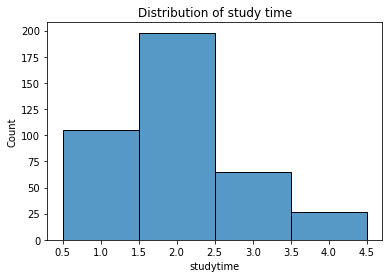

,studytime
2,0.501266
1,0.265823
3,0.164557
4,0.068354


In [76]:
sns.histplot(df['studytime'], discrete=True)
plt.title('Distribution of study time')
plt.show()
df['studytime'].value_counts(normalize=True).to_frame()

50% of students study 2 to 5 hours per week, 27% - less than 2 hours, 7% - more than 10 hours. Seems like students do not like to spend their time on study. Now we can check how it affects their grade. We can suppose, that the more hours of study - the higher grade.

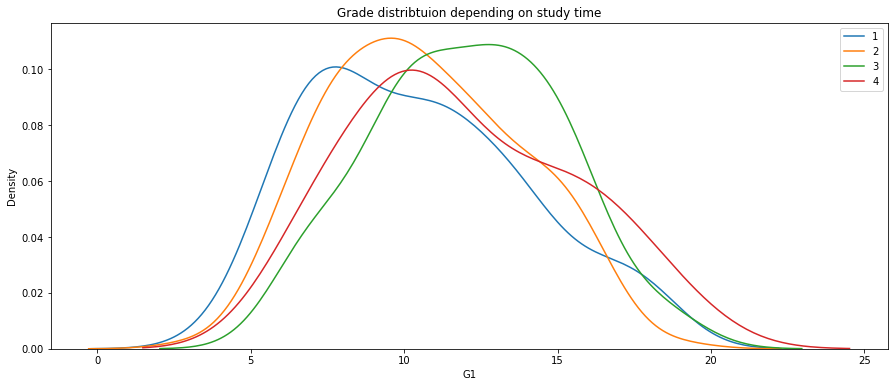

In [77]:
plt.figure(figsize=(15,6))
for studytime, grouped_data in df.groupby('studytime'):
    sns.kdeplot(grouped_data['G1'], label=studytime)
plt.legend()
plt.title('Grade distribtuion depending on study time')
plt.show()

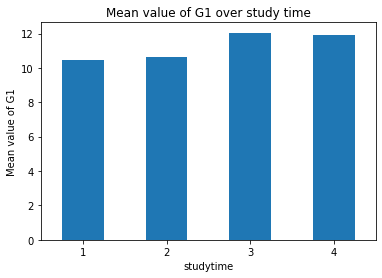

In [78]:
df.groupby('studytime')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over study time')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Our assumption was right. Students that study more than 5 hours per week get a higher grade than those who study less than 5 hours.

#### Absences

Till now we considered the features, that were named "important" by both methods used in the previous paragraph. Let's check the feature *absences*. Based on the Random Forest this feature has the highest importance, but its weight in the Linear Regression was low.  

We have already seen the distribution of absences, but let's do it again to have all information in one place.

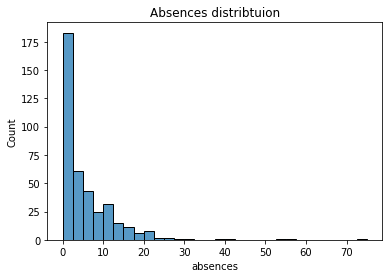

In [79]:
sns.histplot(df['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

Also, we already calculated the linear correlation between absences and grade. The value is -0.031. It means that there is no linear correlation between them. Let's plot G1 versus absences, maybe we will be able to detect another type of dependence. 

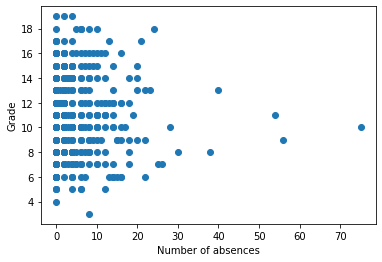

In [80]:
plt.scatter(df['absences'], df['G1'])
plt.xlabel('Number of absences')
plt.ylabel('Grade')
plt.show()

Looking at this plot, it's difficult to conclude anything. 

Based on common sense, students with a high number of absences should have a lower grade. Maybe it starts after a certain threshold. Let's choose 4 thresholds for absences and compare grade of students that have more and fewer absences than that threshold: 0 absences, 5, 10 and 20.

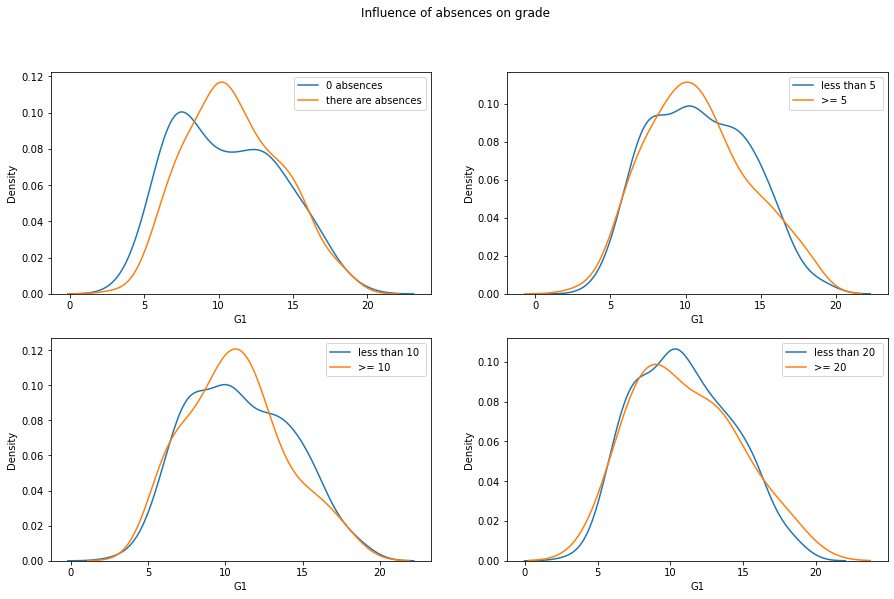

In [81]:
_, axes = plt.subplots(2, 2, figsize=(15,9))
_.suptitle('Influence of absences on grade')
sns.kdeplot(df.query('absences == 0')['G1'], label='0 absences', ax=axes[0, 0])
sns.kdeplot(df.query('absences > 0')['G1'], label='there are absences', ax=axes[0, 0])
axes[0, 0].legend()

sns.kdeplot(df.query('absences < 5')['G1'], label='less than 5 ', ax=axes[0, 1])
sns.kdeplot(df.query('absences >= 5 ')['G1'], label='>= 5', ax=axes[0, 1])
axes[0, 1].legend()

sns.kdeplot(df.query('absences < 10')['G1'], label='less than 10 ', ax=axes[1, 0])
sns.kdeplot(df.query('absences >= 10 ')['G1'], label='>= 10', ax=axes[1, 0])
axes[1, 0].legend()

sns.kdeplot(df.query('absences < 20')['G1'], label='less than 20 ', ax=axes[1, 1])
sns.kdeplot(df.query('absences >= 20 ')['G1'], label='>= 20', ax=axes[1, 1])
axes[1, 1].legend()
plt.show()

From these distributions, we can conclude that number of absences does not affect grade. 

It's weird that Random Forest considered this feature important. Also, Random Forest considered *sex* and *age* important features, but in our analysis, in section 2.1.3 we found out that it is not. Based on this, we can conclude that calculating feature importances based on linear regression coefficients is more reliable for our dataset. 

#### Conclusions

1. Students, that do not have any past class failures, have a better grade.
2. Students with very low freetime after school have a lower grade.
3. Mother's education affects grade. The higher the level of mother's education the better grade.
4. Students, that have extra educational support, have a lower grade.
5. Students that study more than 5 hours per week get a higher grade than those who study less than 5 hours.
6. Number of absences does not affect grade.
7. Since *absences*, *age* and *sex* were considered important features by the Random Forest, but actually, it is not, we can conclude that calculating feature importances based on linear regression coefficients is more reliable for our dataset, because important features from the Linear Regression showed that they affect grade. 

## Data preprocessing

In this paragraph, we will prepare our data for building a machine learning model. 

As we said in section 2.1.1 all grades (G1, G2, G3) have a very strong linear correlation, and on the EDA stage, we considered only G1. We will continue considering only G1 on the modeling stage as well. 

### Matrix of features and dependent variable vector

We have 30 features, all columns except index and grades. Our target is G1.

In [82]:
features = df.copy().drop(['index', 'G1', 'G2', 'G3'], axis=1)
target = df.copy()['G1']

Let's check ourselves.

In [83]:
print(features.shape)
print(target.shape)

(395, 30)
(395,)


In [84]:
features.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


Everything is correct.

### Encoding categorical data

To encode categorical data we will use one hot encoding (OHE).

In [85]:
ohe_columns = []
for col in features.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
        
features = pd.get_dummies(features, drop_first=True, columns=ohe_columns)

In [86]:
features.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,4,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,10,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,4,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


OHE was carried out successfully.

### Train-test split

To estimate the model performance in the future we have to create a test set. In our case, it will contain 20% of all data.

In [87]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            random_state=5)

Let's check.

In [88]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(316, 69)
(79, 69)
(316,)
(79,)


Ok, it looks fine.

It's important that the test and train set has a similar distribution of the target value. Let's check this. If this condition is not met, random seed in train_test_split should be changed.

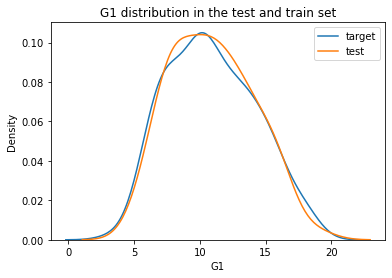

In [89]:
sns.kdeplot(target_train, label='target')
sns.kdeplot(target_test, label='test')
plt.legend()
plt.title('G1 distribution in the test and train set')
plt.show()

In [90]:
print('train mean value:', target_train.mean())
print('test mean value:', target_test.mean())

train mean value: 10.905063291139241
test mean value: 10.924050632911392


The distributions look similar. We can conclude that the split was carried out successfully. 

### Feature scaling

2 numerical features should be standardized.

In [91]:
scaler = StandardScaler()
features_train[['age', 'absences']] = scaler.fit_transform(features_train[['age', 'absences']])
features_test[['age', 'absences']] = scaler.transform(features_test[['age', 'absences']])

In [92]:
features_train.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
48,-1.294304,-0.481547,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
247,4.232726,1.225475,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
42,-1.294304,-0.481547,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,-0.504729,1.713196,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
127,1.863998,-0.481547,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
features_test.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
306,2.653574,-0.725407,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
343,0.284847,-0.725407,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
117,-0.504729,-0.725407,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50,-0.504729,-0.481547,0,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
316,1.074423,-0.725407,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


Standardization was carried out successfully.

### Feature engineering

I do not think, that it's a good idea to make new features in our dataset because the features here are quite clear. So feature engineering in this notebook will imply dropping features that have no influence on the target (these features are garbage for the model).

The procedure will be the following:
1. Define the feature importance as we did in section 2.2.2, but only using the train set.
2. Set a threshold for feature importance, unimportant features are deleted.
3. Build a simple model (we will use KNN) and assess its performance via cross validation.
4. Repeat steps 2 and 3 to find the best model.

Let's build a model and find feature importances.

In [94]:
regressor_lr = LinearRegression()
regressor_lr.fit(features_train, target_train)

LinearRegression()

In [95]:
feature_importances = pd.concat([pd.Series(features_train.columns, name='features'), 
                                 pd.Series(regressor_lr.coef_, name='importance')],
                                axis=1)

feature_importances['importance'] = abs(feature_importances['importance'])

feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

In [96]:
feature_importances.head()

,features,importance
0,failures_3,4.125497
1,famrel_2,3.695198
2,freetime_5,3.061721
3,Medu_2,2.570433
4,Medu_3,2.561818


Now we can make a loop to evaluate different thresholds of importance.

In [97]:
results_features = pd.DataFrame({'threshold' : [], 
                    'number_of_features' : [],
                    'mse' : []})

for threshold in np.arange(0, 4, 0.05):
    features_truncated = features_train.copy()

    for col in features_truncated.columns:
        if feature_importances.loc[feature_importances['features'] == col]['importance'].values < threshold:
            features_truncated = features_truncated.drop(col, axis=1)

    y_pred = cross_val_predict(KNeighborsRegressor(), features_truncated, target_train, cv=5)
    mse = mean_squared_error(target_train, y_pred)
    if results_features.empty or results_features['number_of_features'].iloc[-1] > features_truncated.shape[1]:
        results_features = results_features.append(pd
                                                   .DataFrame([[threshold, 
                                                                features_truncated.shape[1], 
                                                                mse]], 
                                                              columns=results_features.columns))

In [98]:
results_features.sort_values(by='mse').head()

,threshold,number_of_features,mse
0,0.95,30.0,10.862278
0,0.90,32.0,10.901139
0,0.35,44.0,11.009620
0,0.20,48.0,11.055823
0,0.45,41.0,11.087975


The best mean_squared_error was achieved by using a threshold of 0.95 with 30 features. Let's drop unnecessary features.

In [99]:
features_train_truncated = features_train.copy()

for col in features_train_truncated.columns:
    if feature_importances.loc[feature_importances['features'] == col]['importance'].values < 0.95:
        features_train_truncated = features_train_truncated.drop(col, axis=1)

In [100]:
features_train_truncated.head()

,famsize_LE3,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_other,Fjob_services,traveltime_3,studytime_3,...,famrel_5,freetime_2,freetime_5,goout_4,Dalc_4,Dalc_5,health_2,health_3,health_4,health_5
48,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
247,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
42,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
127,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


And the same for the test set.

In [101]:
features_test_truncated = features_test.copy()

for col in features_test_truncated.columns:
    if feature_importances.loc[feature_importances['features'] == col]['importance'].values < 0.95:
        features_test_truncated = features_test_truncated.drop(col, axis=1)

In [102]:
features_test_truncated.head()

,famsize_LE3,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_other,Fjob_services,traveltime_3,studytime_3,...,famrel_5,freetime_2,freetime_5,goout_4,Dalc_4,Dalc_5,health_2,health_3,health_4,health_5
306,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
343,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
50,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
316,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Modeling

The main goal of this part is to build a model that will be able to predict students grade.

It will be done in 3 steps:
1. Training the model.
2. Evaluating the model performance on the test set.
3. Сhecking the model for adequacy (comparison with a constant model).

### Training the model

For training, we will be using XGBRegressor from xgboost library. The choice is based on the fact that usually gradient boosting shows the best results on table data.

GridSearchCV will be used for tuning the hyperparameters of the model.

In [103]:
parameters = {'max_depth' : [2, 3, 4],
              'n_estimators' : [20, 30, 40, 50, 100],
              'eta' : [0.5, 0.4, 0.3, 0.2, 0.1, 0.01],
              'min_child_weight' : [1, 2, 3, 4, 5]}
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42),
                               n_jobs=-1)

grid_search_xgb.fit(features_train_truncated, target_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    va

In [104]:
grid_search_xgb.best_params_

{'eta': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 30}

In [105]:
grid_search_xgb.best_score_

-8.442241016747603

The optimal hyperparameters were defined. Now we can train the model.

In [106]:
regressor = XGBRegressor(max_depth=2, 
                         n_estimators=30,
                         min_child_weight=3,
                         eta=0.4,
                         random_state=42)
regressor.fit(features_train_truncated, target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.4, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=2, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=30, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluating the model performance on the test set

For evaluating RMSE (root mean squared error) will be used.

In [107]:
target_pred = regressor.predict(features_test_truncated)

In [108]:
mean_squared_error(target_test, target_pred) ** 0.5

3.2361960989365

In [109]:
mean_squared_error(target_train,  regressor.predict(features_train_truncated)) ** 0.5

2.424991139970423

The performance on the test set is a bit worse than on the training set, but it's appropriate. We can conclude, that overfitting hasn't happened.

Let's have a look at the learning curve.

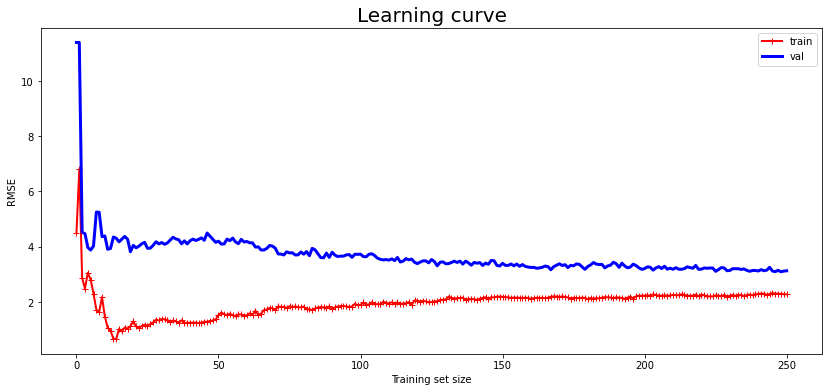

In [110]:
X_train, X_val, y_train, y_val = train_test_split(features_train_truncated, target_train, test_size = 0.2, random_state=100500)
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    regressor.fit(X_train[:m], y_train[:m])
    y_train_predict = regressor.predict(X_train[:m])
    y_val_predict = regressor.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
plt.figure(figsize=(14,6))
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning curve', fontsize = 20)
plt.show()

Ideally, we should have the same RMSE on the training and on the validation sets. The curves tend to converge, but there are not enough data. If the dataset was larger the predictions would be more precise.

### Model adequacy

A model can be recognized as adequate or meaningful if its performance is better than the performance of a constant model (which output is always the same (for example, mean or median value)). For comparison we will be using RMSE. Our model has RMSE of 3.24 on the test.

Let's check the model, that always predict the mean value.

In [111]:
regressor_mean = DummyRegressor(strategy='mean')
regressor_mean.fit(features_train_truncated, target_train)

DummyRegressor()

In [112]:
mean_squared_error(target_test, regressor_mean.predict(features_test_truncated)) ** 0.5

3.129226832177046

**The performance of the constant model is a bit better. Well, we have to admit that we did not manage to get a reasonable model for grade prediction.**